In [83]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score,davies_bouldin_score

 Step 1: Choosing the Best Number of Components (n_components)

A common approach is using AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion).

📌 AIC & BIC:
Lower values indicate a better model fit.

BIC is more strict than AIC (penalizes extra parameters more).

Helps prevent overfitting (too many clusters) and underfitting (too few clusters).

In [84]:
# Generate synthetic dataset

X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.9, random_state=42)

In [85]:
# Try different numbers of components

n_components_range = range(1,10)

aic_values = []

bic_values =[]

In [86]:
for n in n_components_range:

    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)

    gmm.fit(X)

    aic_values.append(gmm.aic(X))

    bic_values.append(gmm.bic(X))

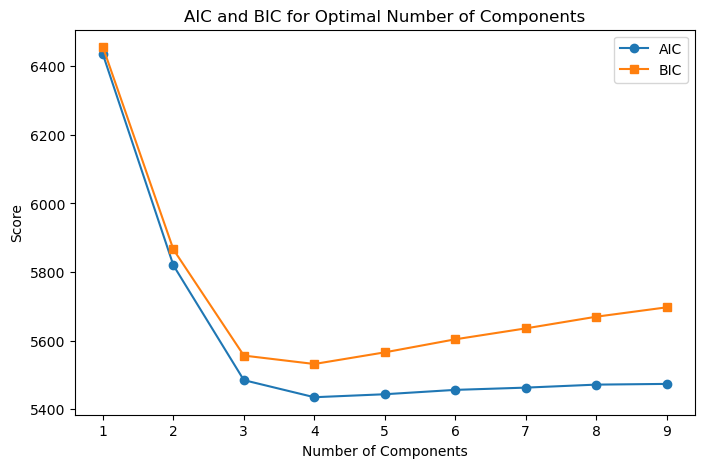

In [87]:
# Plot AIC and BIC values


plt.figure(figsize=(8,5))

plt.plot(n_components_range, aic_values, label='AIC', marker='o' )

plt.plot(n_components_range, bic_values, label='BIC', marker='s' )

plt.xlabel('Number of Components')

plt.ylabel('Score')

plt.legend()

plt.title("AIC and BIC for Optimal Number of Components")

plt.show()

Step 2: Choosing the Best covariance_type


Each dataset has different cluster shapes.

🔹 Key Observations:

If clusters have different orientations → Use full.

If clusters have circular shapes → Use spherical.

If clusters share structure → Use tied.

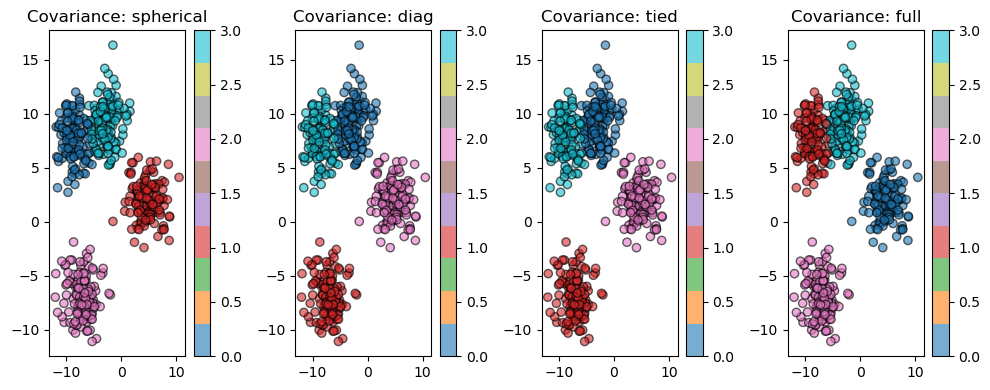

In [88]:
covariance_types = ['spherical', 'diag', 'tied', 'full']

plt.figure(figsize=(10, 4))

for i, cov_type in enumerate(covariance_types, 1 ):

    gmm_cov = GaussianMixture(n_components=4, covariance_type=cov_type, random_state= 42 +i)

    gmm_cov.fit(X)

    label = gmm_cov.predict(X)

    plt.subplot(1,4,i)

    plt.scatter(X[:,0],X[:,1], c=label, cmap='tab10', edgecolors='k',alpha = 0.6 )

    plt.colorbar()  # Show color scale

    plt.title(f'Covariance: {cov_type}')


plt.tight_layout()

plt.show()


Step 3: Improving Convergence Speed (tol)

Default tol=1e-3 works well in most cases.

Lower values (e.g., 1e-4) improve precision but increase runtime.

Higher values (e.g., 1e-2) speed up convergence but may miss optimal parameters.

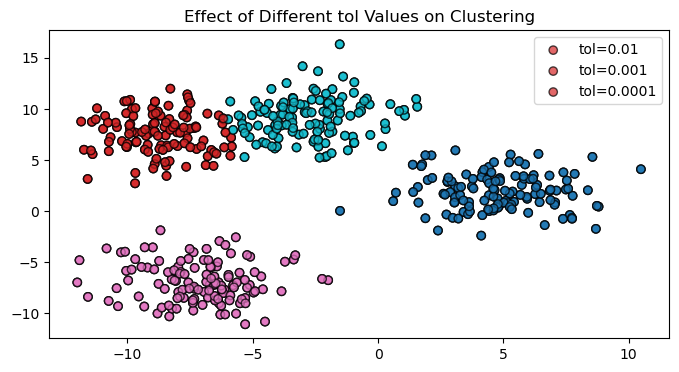

In [89]:
tolerance_values = [1e-2, 1e-3, 1e-4]

plt.figure(figsize=(8,4))


for tol in tolerance_values:

    gmm_tol = GaussianMixture(n_components=4, covariance_type='full', tol=tol, random_state=42)

    gmm_tol.fit(X)

    labels = gmm.predict(X)

    plt.scatter(X[:,0], X[:,1], label=f'tol={tol}',c=label, edgecolors='k',cmap='tab10', alpha=0.7)

plt.legend()

plt.title("Effect of Different tol Values on Clustering")

plt.show()

Adjust tol based on dataset complexity and computational limits.

 Step 4: Handling Noisy Data (Regularization with reg_covar)

If covariance matrices become singular (ill-conditioned), we add regularization.

Default reg_covar=1e-6 is usually fine.

If GMM fails, increase reg_covar (e.g., 1e-3).

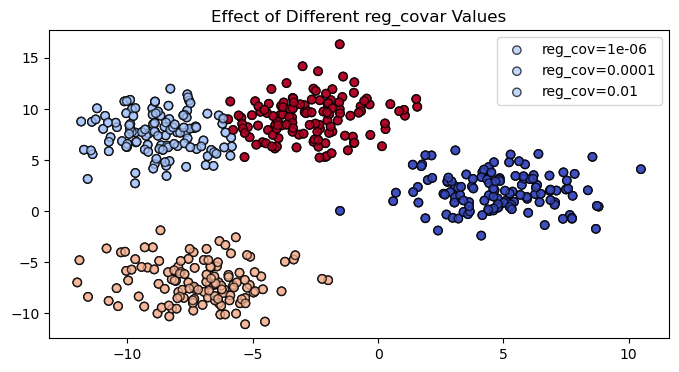

In [90]:
reg_values = [1e-6, 1e-4, 1e-2]

plt.figure(figsize=(8,4))


for reg in reg_values:

    gmm_reg = GaussianMixture(n_components=4, covariance_type='full', reg_covar=reg, random_state=42)

    gmm_reg.fit(X)

    labels = gmm_reg.predict(X)

    plt.scatter(X[:,0],X[:,1], label=f'reg_cov={reg}',c=label,cmap='coolwarm',edgecolors='k',alpha=0.7)


plt.legend()

plt.title("Effect of Different reg_covar Values")

plt.show()

 Step 5: Evaluating GMM Clustering Quality

To measure clustering quality, we use:

Silhouette Score (higher is better)
Davies-Bouldin Index (lower is better)

In [91]:
best_gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)

best_gmm.fit(X)

labels = best_gmm.predict(X)

silhouette = silhouette_score(X,labels)

bouldin_index = davies_bouldin_score(X,labels)

print(f"Silhouette Score: {silhouette:.3f}")

print(f"Davies-Bouldin Index: {bouldin_index:.3f}")

Silhouette Score: 0.610
Davies-Bouldin Index: 0.557


Summary of Fine-Tuning GMM

Hyperparameter	            Effect	Fine-Tuning             Strategy
n_components	            Number of clusters	            Use AIC/BIC to find the best value
covariance_type	            Cluster shape	                Try full, tied, diag, spherical
tol	                        Convergence speed	            Lower = more precise, Higher = faster
reg_covar	                Handles singular matrices	    Increase if model fails